<a href="https://colab.research.google.com/github/Alejandro-A-DS/TFM_entrega_2/blob/main/Anexo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anexo 1. Extracción de la Información Base
---

## Fuente de la Información
---

Para extraer la información necesaria para el proyecto, se utilizó la página web [Stock Analysis](https://stockanalysis.com/) la cual permite, en su versión pro, obtener información precisa de más de 6000 acciones, incluyendo las empresas del S&P500. Estas últimas son las que serán relevantes para la elaboración del proyecto.

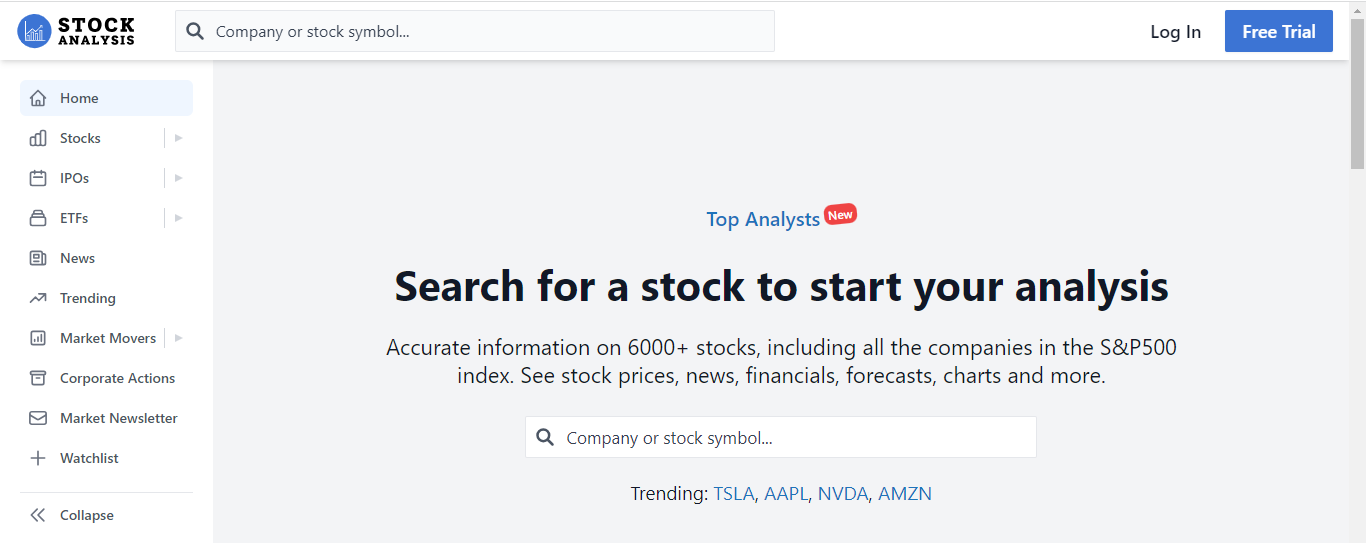

Fuente: [stockanalysis.com](https://stockanalysis.com/)

Una vez se tiene la lista de las empresas presentes en el S&P 500, se procede a buscar cada una de estas para descargar su información. Dentro de la pantalla inicial de Stock Analysis se busca cada una de las empresas mediante su stock symbol. Para mostrar un ejemplo, se buscará la emrpesa Nvidia, cuyo stock symbol es `NVDA`.

Stock Analysis mostrará una gran cantidad de información referente a la empresa que se está buscando. La información que se necesita está dentro de la pestaña `Financials`.

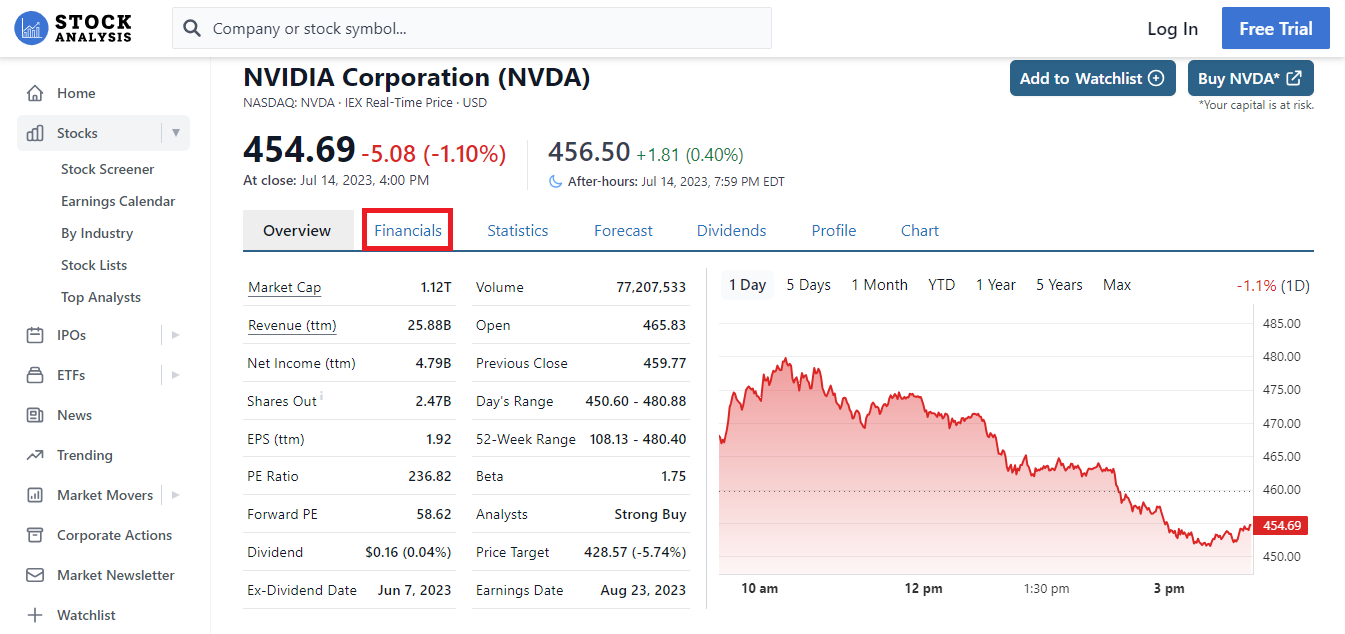

Fuente: [stockanalysis.com](https://stockanalysis.com/)

La pestaña `Financials` ofrece información sobre income, balance y cashflow (que son los grupos de información relevante para el proyecto) y esta información puede ser descargada de forma anual o trimestral. Con el objetivo de obtener la mayor información posible, se descargó la información de forma trimestral, en unidades de millones de dólares y en formato Excel.

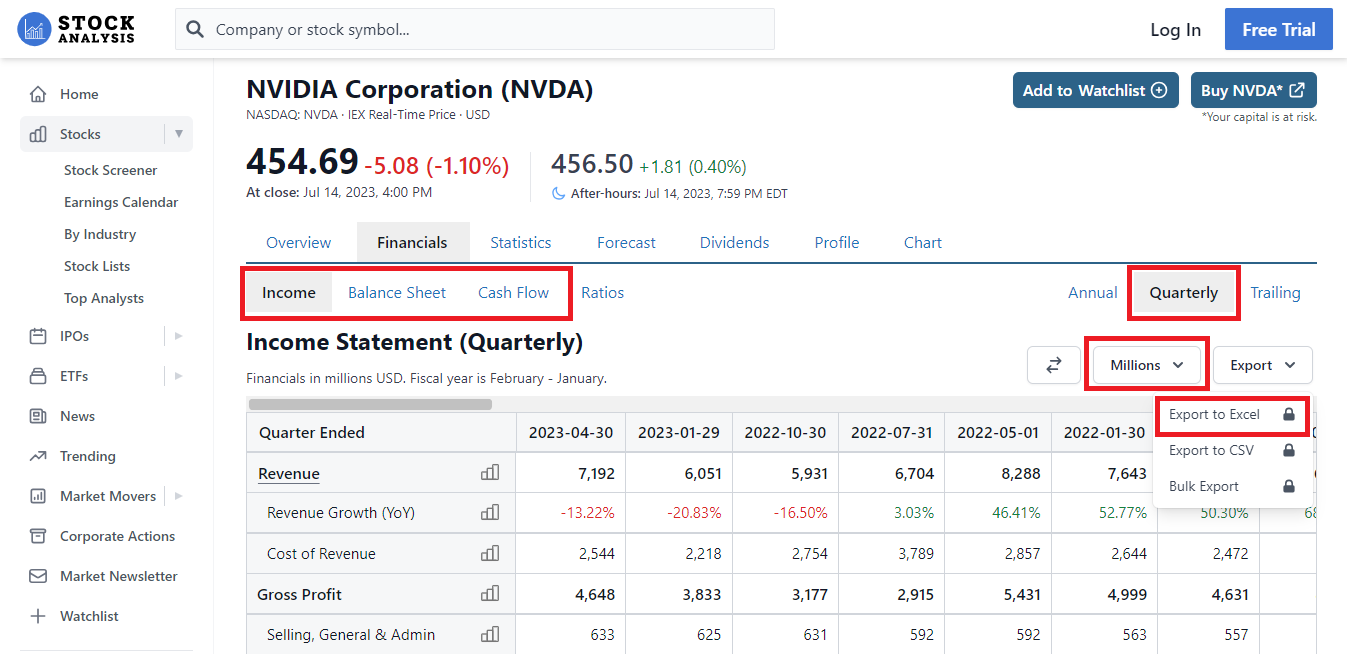

Fuente: [stockanalysis.com](https://stockanalysis.com/)

Este proceso se repitió para todas las empresas del S&P 500 y para cada empresa se descargó la información disponible de Income, Balance y Cashflow.

Una vez descargados los archivos de income, balance y cashflow, se realizó una exploración inicial en cara uno de los archivos.


## Visualización de la Información extraida
---

Dentro de la información de cada tipo de archivo no se encuentra una fila o celda que permita identificar con qué acción se está trabajando. Es necesario tener esta fila o columna para saber a qué acción pertenece la información, por esto, se creó un pequeño código en Python el cual escanea y copia en una lista el nombre de todos los archivos de un directorio, luego abre cada archivo como un dataframe de pandas, agrega la columna con el nombre de la acción y lo guarda. La creación de este código es necesaria dada la cantidad de archivos a manipular (450+).

A continuación se presenta el código utilizado para agregar la columna `Accion` a todos los archivos descargados.



```
import os
import pandas as pd

# Ruta del directorio donde están los archivo
directorio = 'C:/Users/admin/Desktop/Archivos_TFM'

nombres_archivos = [nombre for nombre in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, nombre))]
nombres_archivos.remove("script_1.ipynb")

for archivo in nombres_archivos:

    df = pd.read_excel(archivo)
    df['Accion'] = archivo.split("-")[0]

    df.to_excel(archivo, index=False)
```



La ejecución de este código permitió incluir una columna con el código de la acción en cada uno de los archivos y así tener trazabilidad de la información de cada acción.

Un aspecto interesante a resaltar sobre los archivos descargados es la disposición de la información. Las variables está en dispuestas de forma horizontal (como filas) y las fechas está como columnas. En la siguiente imagen se presenta un ejemplo de lo comentado.

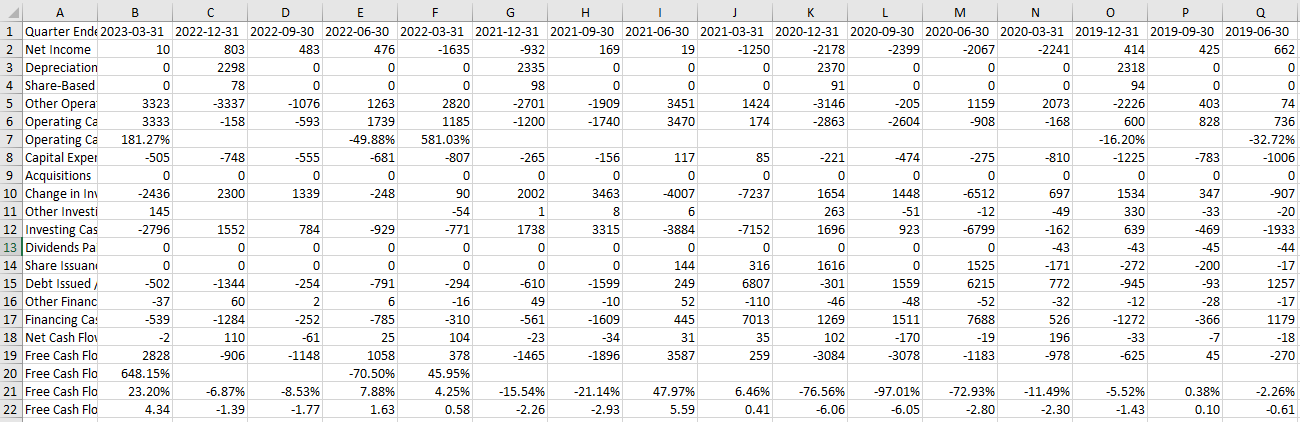

Fuente: Elaboración propia.

## Modificación de los Archivos
---

Teniendo en cuenta esta disposición, ya las variables necesarias para la creación de los dataset de income, balance y cashflow. Se desarrollaron tres códigos que manipularan cada uno de los archivos de tal manera que las fechas quedaran como filas, y las variables como columnas.

Las variables necesarias para el dataset de income son:

- Net Income.
- Shares Outstanding (Basic).
- Dividend Per Share.
- EBIT.
- EBITDA.
- Revenue.
- Accion.

Las variables necesarias para el dataset de balance son:

- Cash & Cash Equivalents.
- Total Assets.
- Total Liabilities.
- Shareholders' Equity.
- Total Long-Term Liabilities.
- Total Current Liabilities.
- Long-Term Debt.
- Current Debt
- Accion.

Las variables necesarias para el dataset de cashflow son:

- Net Cash Flow.
- Free Cash Flow.
- Dividends Paid.
- Accion

En todos los tipos de variables se conserva el símbolo de la acción.

A continuación se presenta el código desarrollado para la creación de dataset final de income:

```
import os
import pandas as pd

df_final = pd.DataFrame(columns=["Net Income", "Shares Outstanding (Basic)", "Dividend Per Share", "EBIT","EBITDA", "Revenue", "Accion"])

# Directorio de los archivos de income
directorio = 'C:/Users/admin/Desktop/Test/Income'

nombres_archivos = [nombre for nombre in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, nombre))]

nombres_archivos.remove("dataset_income.ipynb")

archivos_problematicos = []

for archivo in nombres_archivos:

    try:
    
        df = pd.read_excel(archivo)
        df1_n = df.iloc[:,0:-1]
        df1_n = df1_n.set_index("Quarter Ended").transpose()
        df1_n = df1_n[["Net Income", "Shares Outstanding (Basic)", "Dividend Per Share", "EBIT","EBITDA", "Revenue"]]
        df1_n["Accion"] = df["Accion"][0]
        df_final = pd.concat([df_final,df1_n], axis=0)

    except:

        archivos_problematicos.append(archivo)

df_final.to_excel("df_final_income.xlsx")
```



Código para la creación del dataset final de balance:



```
import os
import pandas as pd

df_final = pd.DataFrame(columns=["Cash & Cash Equivalents", "Total Assets", "Total Liabilities","Shareholders' Equity","Total Long-Term Liabilities", "Total Current Liabilities","Long-Term Debt","Current Debt","Accion"])

# Directorio de los archivos de balance
directorio = 'C:/Users/admin/Desktop/Test/Balance'

nombres_archivos = [nombre for nombre in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, nombre))]

nombres_archivos.remove("dataset_balance.ipynb")


archivos_problematicos = []


for archivo in nombres_archivos:
    
    try:

        df = pd.read_excel(archivo)
        df1_n = df.iloc[:,0:-1]
        df1_n = df1_n.set_index("Quarter Ended").transpose()
        df1_n = df1_n[["Cash & Cash Equivalents", "Total Assets", "Total Liabilities","Shareholders' Equity","Total Long-Term Liabilities","Total Current Liabilities","Long-Term Debt","Current Debt"]]
        df1_n["Accion"] = df["Accion"][0]
        df_final = pd.concat([df_final,df1_n], axis=0)

    except:

        archivos_problematicos.append(archivo)

df_final.to_excel("df_final_balance.xlsx")
```




Código para la creación del dataset final de cashflow:



```
import os
import pandas as pd

df_final = pd.DataFrame(columns=["Net Cash Flow", "Free Cash Flow","Dividends Paid","Accion"])

# Directorio de los archivos de cashflow
directorio = 'C:/Users/admin/Desktop/Test/CashFlow'

nombres_archivos = [nombre for nombre in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, nombre))]

nombres_archivos.remove("dataset_cashflow.ipynb")

archivos_problematicos = []

for archivo in nombres_archivos:

    try:
    
        df = pd.read_excel(archivo)
        df1_n = df.iloc[:,0:-1]
        df1_n = df1_n.set_index("Quarter Ended").transpose()
        df1_n = df1_n[["Net Cash Flow", "Free Cash Flow","Dividends Paid"]]
        df1_n["Accion"] = df["Accion"][0]
        df_final = pd.concat([df_final,df1_n], axis=0)

    except:

        archivos_problematicos.append(archivo)

df_final.to_excel("df_final_cashflow.xlsx")
```



## Visualización de los Resultados Obtenidos Después del Procesado
---

La ejecución de estos código generó un dataframe cada uno un dataframe el cual se exportó en formato xlsx y posteriormente a csv para reducir sus tamaños. Estos tres datasets finales en formato csv se cargaron en un repositorio de `github` para poder ser cargados en este notebook.

In [ ]:
import pandas as pd

# Direcciones URL de los tres datasets creados

url_income = "https://raw.githubusercontent.com/Alejandro-A-DS/Datos_Master/main/df_final_income.csv"
url_balance = "https://raw.githubusercontent.com/Alejandro-A-DS/Datos_Master/main/df_final_balance.csv"
url_cashflow = "https://raw.githubusercontent.com/Alejandro-A-DS/Datos_Master/main/df_final_cashflow.csv"

# Conversión de los archivos csv a DataFrames de Pandas

df_income = pd.read_csv(url_income)
df_balance = pd.read_csv(url_balance)
df_cashflow = pd.read_csv(url_cashflow)

In [ ]:
df_income.head()

,Unnamed: 0,Net Income,Shares Outstanding (Basic),Dividend Per Share,EBIT,EBITDA,Revenue,Accion
0,2023-01-31,352,296,0.225,435,502,1756,A
1,2022-10-31,368,296,0.21,478,551,1849,A
2,2022-07-31,329,298,0.21,416,496,1718,A
3,2022-04-30,274,299,0.21,354,436,1607,A
4,2022-01-31,283,301,0.21,340,422,1674,A


In [ ]:
df_balance.head()

,Unnamed: 0,Cash & Cash Equivalents,Total Assets,Total Liabilities,Shareholders' Equity,Total Long-Term Liabilities,Total Current Liabilities,Long-Term Debt,Current Debt,Accion
0,2023-01-31,1250.0,10919.0,5310.0,5609.0,3374.0,1936.0,2733.0,238.0,A
1,2022-10-31,1053.0,10532.0,5227.0,5305.0,3366.0,1861.0,2733.0,36.0,A
2,2022-07-31,1077.0,10484.0,5393.0,5091.0,3491.0,1902.0,2732.0,180.0,A
3,2022-04-30,1207.0,10455.0,5333.0,5122.0,3520.0,1813.0,2730.0,175.0,A
4,2022-01-31,1158.0,10327.0,5173.0,5154.0,3589.0,1584.0,2730.0,0.0,A


In [ ]:
df_cashflow.head()

,Unnamed: 0,Net Cash Flow,Free Cash Flow,Dividends Paid,Accion
0,2023-01-31,197.0,220.0,-67.0,A
1,2022-10-31,-17.0,378.0,-62.0,A
2,2022-07-31,-115.0,244.0,-62.0,A
3,2022-04-30,72.0,219.0,-63.0,A
4,2022-01-31,-374.0,180.0,-63.0,A


Estos tres dataset son la base para crear el dataset final de KPI (Key Performance Indicators), el cual será el set de datos para realizar la clusterización.

La preparación, manipulación y transformación de estos tres data sets se detalla en el Anexo 2.